In [3]:
import pandas as pd
import numpy as np

In [5]:

from itertools import combinations
from src.Extinction_map import Extinction_Trainer,Extinction_Map,BNN_Extinction
from src.Bayesian_NN_nodist import BayesianExtinction_Trainer
from astropy.coordinates import SkyCoord
from dustmaps.planck import PlanckQuery

from dustmaps.bayestar import BayestarQuery
from dustmaps.lenz2017 import Lenz2017Query

from astropy.coordinates import SkyCoord
import astropy.units as u
import pyro
from dustmaps.edenhofer2023 import Edenhofer2023Query
 



    

# Define Galactic coordinates (l, b) in degrees
l = 104.2  # Galactic longitude in degrees
b = 22.5   # Galactic latitude in degrees
b = 22.3   # Galactic latitude in degrees
galactic_coord = SkyCoord(l=l*u.degree, b=b*u.degree, frame='galactic')
equatorial_coord = galactic_coord.transform_to('icrs')
print(equatorial_coord)

ImportError: cannot import name 'BNN_Extinction' from 'src.Extinction_map' (/Users/mattocallaghan/XPNorm/src/Extinction_map.py)

In [3]:
csv_location='/Users/mattocallaghan/XPNorm/Data/data_test'
data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values

csv_location='/Users/mattocallaghan/XPNorm/Data/data_full'
data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m']].values


In [4]:
csv_location='/Users/mattocallaghan/XPNorm/Data/data_full'
data=pd.read_csv(csv_location)[['mu','phot_g_mean_mag','phot_bp_mean_mag','phot_rp_mean_mag','j_m','h_m','ks_m','ra','dec']]
data=data[:len(data)//32]

In [29]:
len(data)

10951

In [7]:
galactic_coord = SkyCoord(ra=data['ra'].values*u.degree, dec=data['dec'].values*u.degree, frame='icrs')
equatorial_coord = galactic_coord.transform_to('galactic')

In [8]:
(equatorial_coord.b.max()-equatorial_coord.b.min())/2

<Angle 56.19268638 deg>

In [9]:
data['dec'].max()-data['dec'].min()

114.46785794344808

In [10]:
data['bprp']=data['phot_bp_mean_mag']-data['phot_rp_mean_mag']
data['G']=data['phot_bp_mean_mag']-data['mu']

In [11]:
data_test=data.copy()

In [12]:
from src.Normalising_Flow_nodist import Normalising_Flow_Trainer
nf=Normalising_Flow_Trainer()
nf.load()

In [13]:


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for your paper layout
#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

data_test['d']=np.sin(np.radians(25))*(10 ** ((((data_test['mu'])) + 5) / 5))
data['d']=np.sin(np.radians(45))*(10 ** ((((data['mu'])) + 5) / 5))

# Creating the 2D histogram
sn.kdeplot(data[:len(data)//32],x='d',y='bprp',legend=True,c='b')

sn.kdeplot(data_test[:len(data_test)//32],x='d',y='bprp',legend=True,c='red')

plt.plot([], [], color='red', label='Red Data')
plt.plot([], [], color='b', label='Training Region')
plt.legend()
# Setting labels and title
plt.xlabel('$r$ $\sin(b)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
#plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

plt.xlim(-300,3000)
plt.tight_layout()
bounds = [(346, 393), (1250, 2140)]

# Create a figure and axis

# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_distance_angle.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_distance_angle.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()
plt.show()

NameError: name 'plt' is not defined

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

(10.0, 2.0)

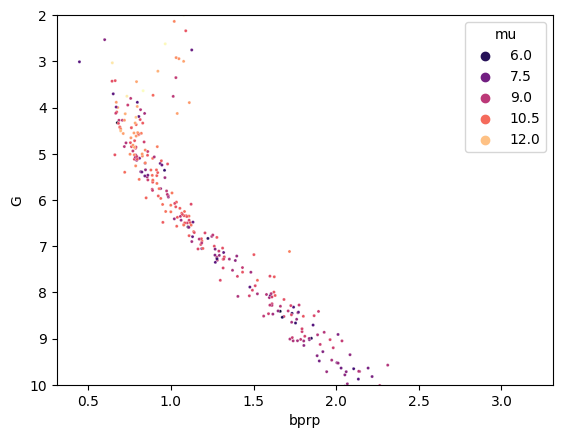

In [15]:
import seaborn as sn
sn.scatterplot(data[:len(data)//32],x='bprp',y='G',hue='mu',s=5,palette='magma')
plt.ylim(10,2)

(10.0, 2.0)

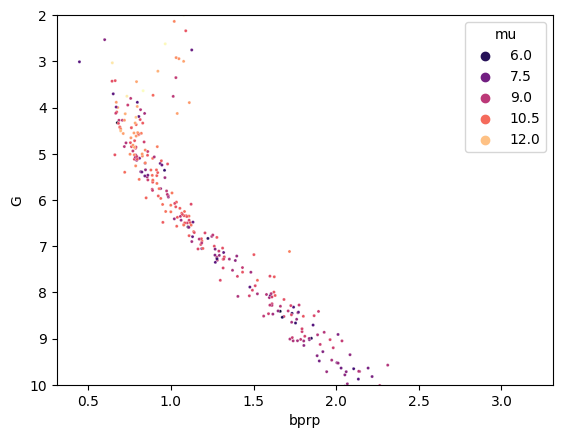

In [16]:
import seaborn as sn
sn.scatterplot(data[:len(data)//32],x='bprp',y='G',hue='mu',s=5,palette='magma')
plt.ylim(10,2)

In [17]:
pd.read_csv('/Users/mattocallaghan/XPNorm/Data/err').mean()

Unnamed: 0    63.500000
ks_msigcom     0.057250
mu_error       0.052748
g_error        0.003038
bp_error       0.006112
rp_error       0.003835
j_msigcom      0.034000
h_msigcom      0.047750
ra_error       0.025399
dec_error      0.027358
dtype: float64

In [18]:



data_transform=np.array([
                                [1., 0., 0., 0., 0., 0.,0],
                                [-1., 1., 0., 0., 0., 0.,0],
                                [0., 1., -1., 0., 0., 0.,0],
                                [0., 1., 0., -1., 0., 0.,0],
                                [0., 1., 0., 0., -1., 0.,0],
                                [0., 1., 0., 0., 0., -1.,0],
                                [0., 1., 0., 0., 0., 0.,-1]])

g = np.array([0.7, 0.95])
bp =  np.array([0.97, 1.28])
rp =  np.array([0.55, 0.69])
j =  np.array([0.71, 0.73])/3.1
h =  np.array([0.45, 0.47])/3.1
ks =  np.array([0.34, 0.36])/3.1

#extinction_vector=torch.tensor(np.einsum('ij,j->i',data_transform,
#np.array([0,g.mean(), bp.mean(), rp.mean(), j.mean(), h.mean(), ks.mean()])))
    

data=np.einsum('ij,bj->bi',np.array(data_transform),np.array(data))



ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (7,7)->(7,7) (10951,11)->(10951,newaxis,11) 

In [19]:
import matplotlib.pyplot as plt

In [20]:
plt.scatter(-data[:,2],data[:,1],s=2)
plt.ylim(12,0)
plt.show()


InvalidIndexError: (slice(None, None, None), 2)

In [ ]:
plt.hist2d(data[:,3],data[:,1],bins=500)
plt.ylim(12,0)|
plt.show()


SyntaxError: invalid syntax (1139725641.py, line 2)

In [ ]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout

# Creating the 2D histogram
plt.hist2d(data[:,3], data[:,1], bins=500, cmap='viridis')  # Adjust the colormap as needed

# Setting labels and title
plt.xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top

# Adding a colorbar for better interpretation of the histogram
cbar = plt.colorbar()
cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

InvalidIndexError: (slice(None, None, None), 3)

<Figure size 700x450 with 0 Axes>

In [21]:
nf.losses

[]

In [25]:
x=np.concatenate(x)

In [26]:
import seaborn as sn

<Axes: ylabel='Density'>

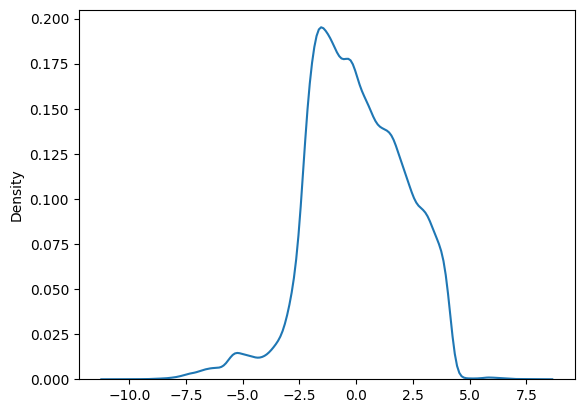

In [27]:
sn.kdeplot(x[:,0]-nf.mean[0])
#plt.xlim(0,2)

In [24]:
import torch

In [25]:
x.shape

(104180, 6)

In [40]:
p=nf.nfm.log_prob(torch.tensor(x-nf.mean))

<Figure size 1500x700 with 0 Axes>

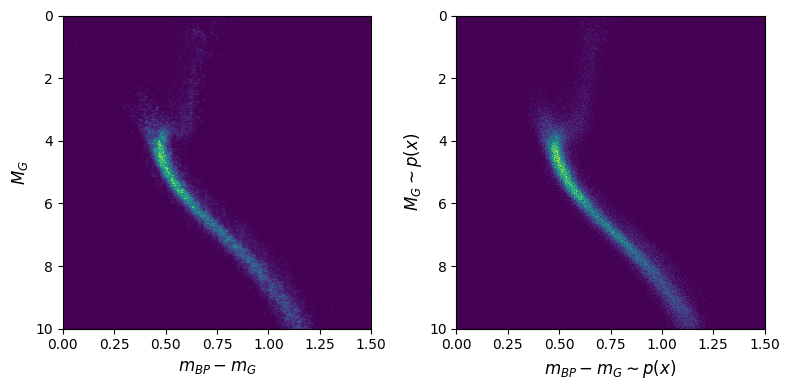

In [26]:
x=[nf.sample(len(nf.data)//32) for _ in range(10)]
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(nf.data[:,3-1]+nf.mean[3-1], nf.data[:,1-1]+nf.mean[1-1],bins=500)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3-1], x[:,1-1],bins=500)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{G}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,1.5)
axes[1].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,1.5)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

<Figure size 1500x700 with 0 Axes>

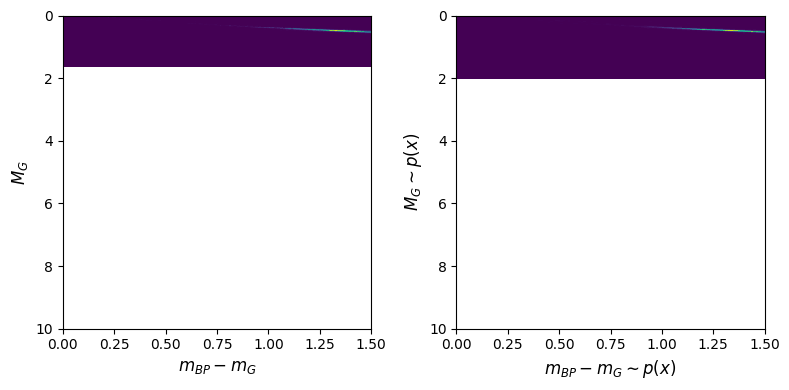

In [42]:
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(nf.data[:,3+1]+nf.mean[3+1], nf.data[:,1+1]+nf.mean[1+1],bins=500)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3+1], x[:,1+1],bins=500)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{G}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,1.5)
axes[1].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,1.5)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [ ]:
nf.data[:,0]

array([ 0.61855768, -0.69288617, -1.04473308, ..., -0.77754662,
        0.08706452, -2.18840765])

In [ ]:
x[:,0]

array([10.69319101,  9.96620861,  9.36047285, ...,  9.38316802,
       10.97501445,  9.95290256])

In [ ]:
b = torch.Tensor([1,1,0,0,0,0,0,0])
cp=x[x[:,0]<00.5]-nf.mean
cp[:,0]=1
distance = 10 ** (((torch.tensor(cp[:, 1:2])).detach().numpy() + nf.mean[1] + 5) / 5)

plt.scatter(distance,nf.t(torch.tensor(cp[:,1:])).detach())
plt.xlim(0,2000)

AttributeError: 'Normalising_Flow_Trainer' object has no attribute 't'

InvalidIndexError: (slice(None, None, None), 3)

<Figure size 1500x700 with 0 Axes>

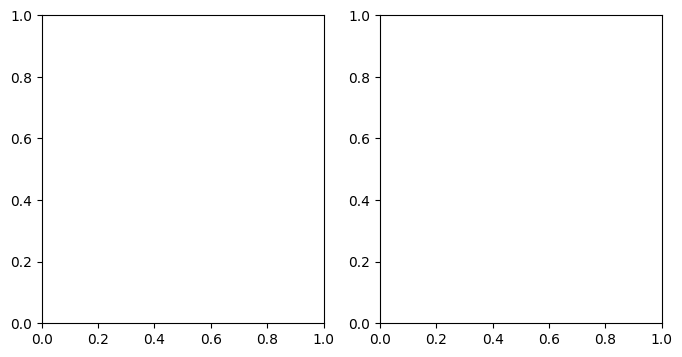

In [ ]:
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(8)
axes[0].hist2d(data[:,3],data[:,1],bins=100)  # Adjust the colormap as needed

# Creating the 2D histogram
axes[1].hist2d(x[:,3], x[:,1],bins=100)  # Adjust the colormap as needed
axes[0].set_xlabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_ylabel('$M_{G}$', fontsize=12)  
# Setting labels and title
axes[1].set_xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
axes[0].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[0].set_xlim(0,1.25)
axes[1].set_ylim(10, 0)  # Reverse the y-axis to have increasing values from bottom to top
axes[1].set_xlim(0,1.25)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/hr_d_sampled.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

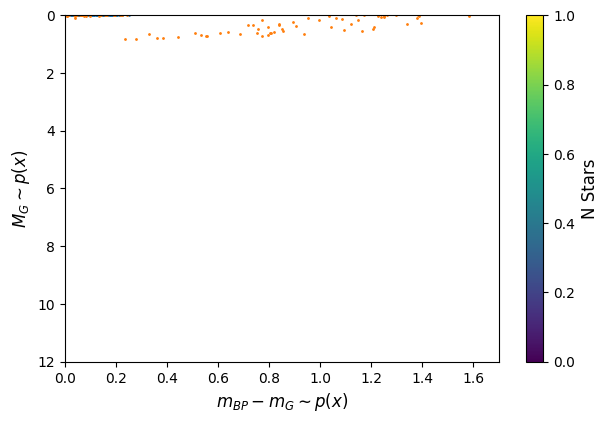

In [43]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout
plt.scatter(nf.data[:,3]+nf.mean[3], nf.data[:,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

# Creating the 2D histogram
plt.scatter(x[:,3], x[:,1],s=1)  # Adjust the colormap as needed

# Setting labels and title
plt.xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
cbar = plt.colorbar()
cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

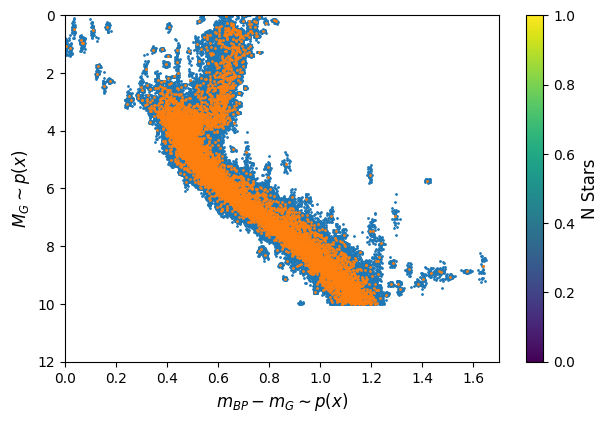

In [ ]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout
plt.scatter(nf.data[:,3]+nf.mean[3], nf.data[:,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

# Creating the 2D histogram
plt.scatter(nf.data[:len(nf.data)//32,3]+nf.mean[3], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed

# Setting labels and title
plt.xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
cbar = plt.colorbar()
cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

In [ ]:
pd.DataFrame(np.stack([x[:,3],x[:,0],p.detach().numpy()],axis=1))

,0,1,2
0,0.456915,10.693191,7.684373
1,0.688661,9.966209,4.240045
2,0.490495,9.360473,7.140629
3,0.615907,9.500969,6.277420
4,0.499675,11.161287,5.801774
...,...,...,...
9995,0.559036,11.056519,-0.879332
9996,0.488114,8.391685,10.060657
9997,0.798448,9.383168,7.679238
9998,0.520514,10.975014,7.000980


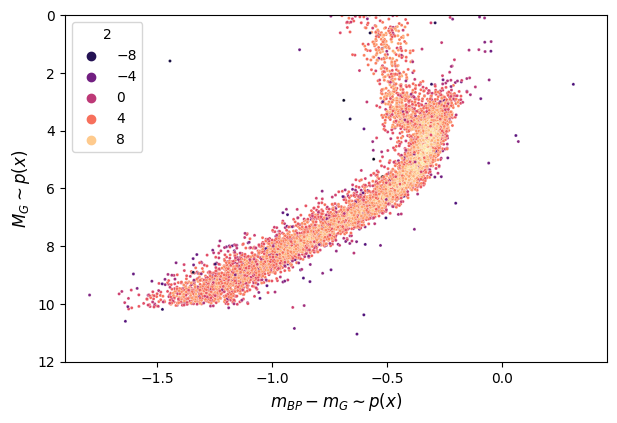

In [ ]:
plt.figure(figsize=(7, 4.5))  # Adjust the figure size as needed for your paper layout
p#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:,2],x[:,1],p.detach()],axis=1))
# Creating the 2D histogram
sn.scatterplot(df,x=0,y=1,hue=2,s=5,palette='magma')
# Setting labels and title
plt.xlabel('$m_{BP}-m_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$M_{G} \sim p(x)$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
#plt.savefig('hr_d.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.show()

In [ ]:


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for your paper layout
#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:len(x)//5,0],x[:len(x)//5,2]],axis=1))
df2=pd.DataFrame(np.stack([nf.data[:len(x)//5,0]+nf.mean[0], nf.data[:len(x)//5,2]+nf.mean[2]],axis=1))

df=df[df[0]>6]
df=df[df[0]<14]
df=df[df[1]>-1.6]
df=df[df[1]<0.5]
df2=df2[df2[0]>6]
df2=df2[df2[0]<14]
df2=df2[df2[1]>-1.6]
df2=df2[df2[1]<0.5]
# Creating the 2D histogram
sn.kdeplot(df2,x=0,y=1,legend=True,c='b')

sn.kdeplot(df,x=0,y=1,legend=True,c='brown')
plt.plot([], [], color='b', label='Training Data')
plt.plot([], [], color='brown', label='Reddened Region')
plt.legend()
# Setting labels and title
plt.xlabel('$\mu$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
#plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
plt.savefig('mu_colour_sam.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('mu_colour_sam.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [12]:
import seaborn as sn

/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


<Axes: xlabel='bprp', ylabel='mu'>

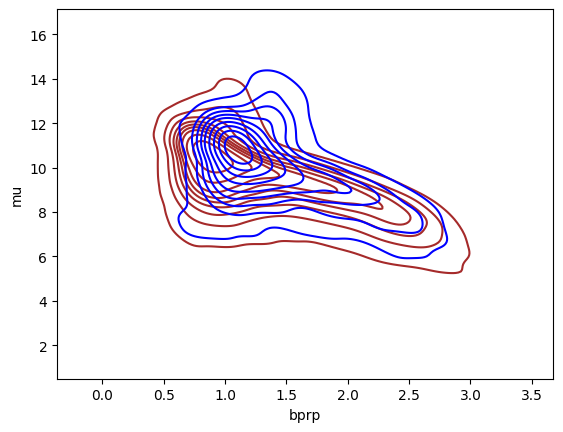

In [34]:
sn.kdeplot(data,x='bprp',y='mu',legend=True,c='brown')
sn.kdeplot(data_test,x='bprp',y='mu',legend=True,c='b')



/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


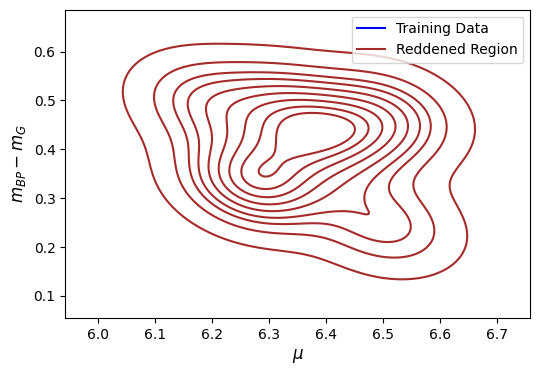

In [ ]:


plt.figure(figsize=(6, 4))  # Adjust the figure size as needed for your paper layout
#lt.scatter(nf.data[:len(nf.data)//32,0]+nf.mean[0], nf.data[:len(nf.data)//32,1]+nf.mean[1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:len(x)//5,0],x[:len(x)//5,2]],axis=1))
df2=pd.DataFrame(np.stack([nf.data[:len(x)//5,0]+nf.mean[0], nf.data[:len(x)//5,2]+nf.mean[2]],axis=1))

df=df[df[0]>6]
df=df[df[0]<14]
df=df[df[1]>-1.6]
df=df[df[1]<0.5]
df2=df2[df2[0]>6]
df2=df2[df2[0]<14]
df2=df2[df2[1]>-1.6]
df2=df2[df2[1]<0.5]
# Creating the 2D histogram
sn.kdeplot(df2,x=0,y=1,legend=True,c='b')

sn.kdeplot(df,x=0,y=1,legend=True,c='brown')
plt.plot([], [], color='b', label='Training Data')
plt.plot([], [], color='brown', label='Reddened Region')
plt.legend()
# Setting labels and title
plt.xlabel('$\mu$', fontsize=12)  # Adjust the label and font size as needed
plt.ylabel('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#plt.title('2D Histogram', fontsize=14)  # Adjust the title and font size as needed

# Setting axis limits
#plt.ylim(12, 0)  # Reverse the y-axis to have increasing values from bottom to top
#plt.xlim(0,1.7)
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed

# Saving the plot
plt.savefig('mu_colour_sam.pdf', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('mu_colour_sam.png', dpi=300, bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [ ]:
nf.data_test

AttributeError: 'Normalising_Flow_Trainer' object has no attribute 'data_test'

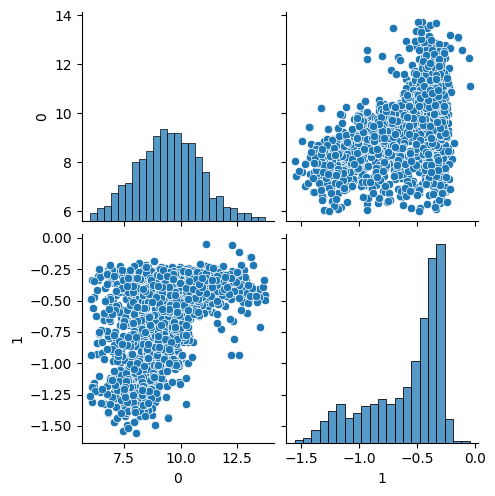

In [ ]:
sn.pairplot(df)

In [ ]:
plt.scatter(data[:len(data)//32,0], data[:len(data)//32,1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:,0],x[:,1],p.detach().numpy()],axis=1))
# Creating the 2D histogram
sn.scatterplot(df,x=0,y=1,hue=2,s=1)

InvalidIndexError: (slice(None, 2546, None), 0)

In [ ]:
#plt.scatter(data[:len(data)//32,0], data[:len(data)//32,1],s=1)  # Adjust the colormap as needed
df=pd.DataFrame(np.stack([x[:,0],x[:,1],x[:,0]],axis=1))
# Creating the 2D histogram
sn.kdeplot(x[:,5])
sn.kdeplot(nf.data[:len(nf.data)//32,5]+nf.mean[5])

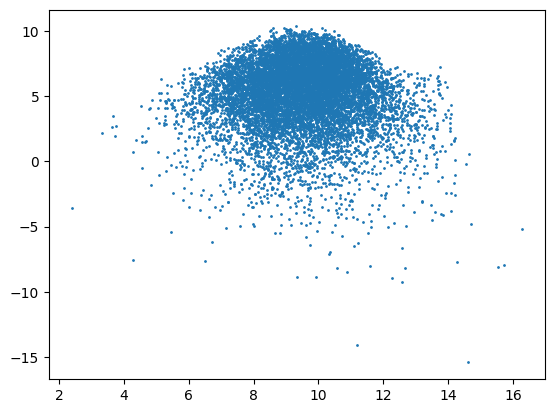

In [ ]:
plt.scatter(x[:,0], p.detach().numpy(),s=1)  # Adjust the colormap as needed


<Figure size 1800x900 with 0 Axes>

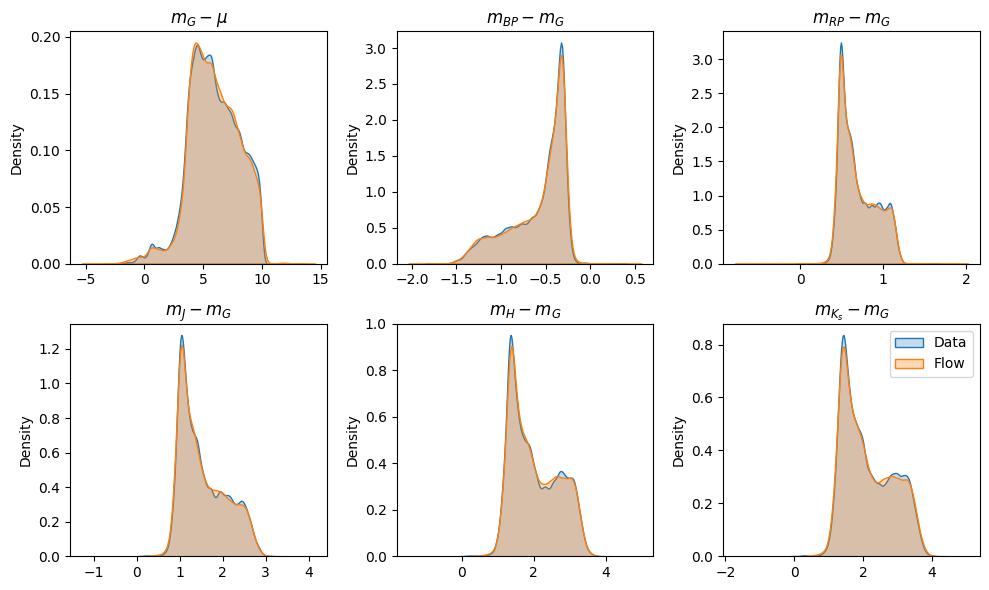

In [31]:
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(2,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((nf.data[:,0]+nf.mean[0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,1]+nf.mean[1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,2]+nf.mean[2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,3]+nf.mean[3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,4]+nf.mean[4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,5]+nf.mean[5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,-1]+x[:,1],label='Flow',ax=axes[8],fill=True,alpha=0.3)

#axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_title('$m_G-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_title('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[2].set_title('$m_{RP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[3].set_title('$m_{J}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[4].set_title('$m_{H}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[5].set_title('$m_{K_s}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
#axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
#axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [5]:
from src.Bayesian_NN import BayesianExtinction_Trainer

In [6]:
x=BayesianExtinction_Trainer().data_test+nf.mean

NameError: name 'nf' is not defined

In [ ]:
len(x)/len(nf.data)

0.23964839510936406

<Figure size 1800x900 with 0 Axes>

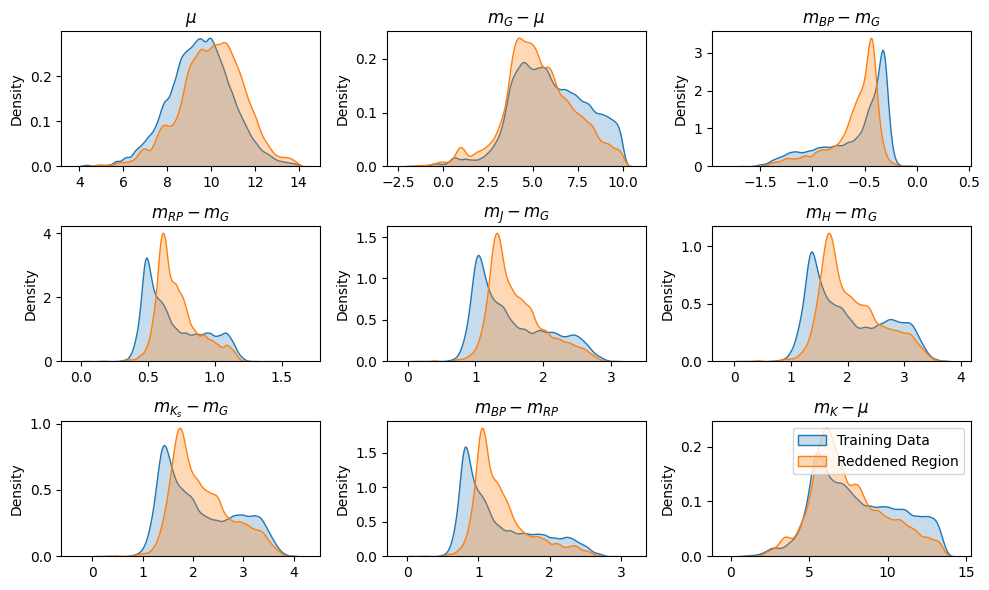

In [ ]:
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(3,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((nf.data[:,0]+nf.mean[0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,1]+nf.mean[1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,2]+nf.mean[2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,3]+nf.mean[3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,4]+nf.mean[4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,5]+nf.mean[5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Training Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,-1]+x[:,1],label='Reddened Region',ax=axes[8],fill=True,alpha=0.3)

axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1].set_title('$m_G-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[2].set_title('$m_{BP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[3].set_title('$m_{RP}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[4].set_title('$m_{J}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[5].set_title('$m_{H}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[6].set_title('$m_{K_s}-m_{G}$', fontsize=12)  # Adjust the label and font size as needed
axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare_test.png', bbox_inches='tight')  # Adjust filename and DPI as needed
plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare_test.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

<Axes: ylabel='Density'>

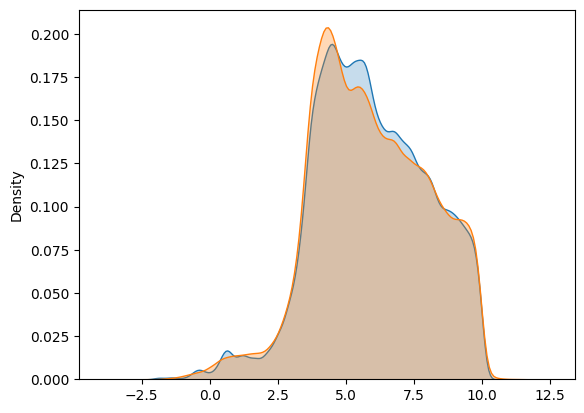

In [ ]:
i=3
sn.kdeplot((nf.data[:,0]+nf.mean[0]),label='Data',fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',fill=True,alpha=0.3)



/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(
/opt/homebrew/Caskroom/miniforge/base/envs/astro/lib/python3.8/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'c'
  cset = contour_func(


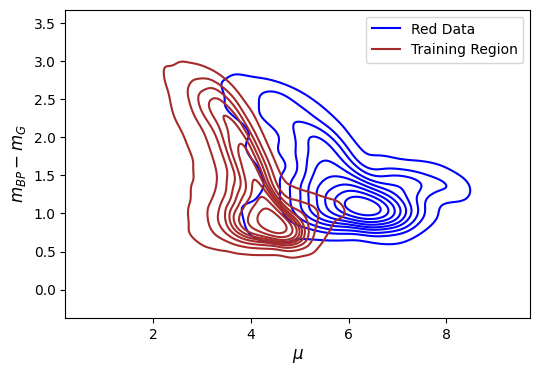